<h1 style="text-align:center; font-size:40px; color:black;"> Loan Default Analysis </h1>

***
**Who:** Loan decision-makers, such as credit analysts, loan officers, and risk managers, who check borrower risk and decide loan approvals.
  
**What:** Improve loan approval models by finding risk factors like education level, age, loan amount, and interest rate. The goal is to reduce loan defaults and increase profits by making better lending decisions.
  
**How:** Present statistical insights, correlation findings, and visual evidence to support informed lending decisions. Use different data visualizations to show patterns and insights:
- `Bar charts` to show how default rates change with education level. This helps to see if education affects loan repayment.
- `Histograms` to understand the distribution of borrower ages and other key numeric features. This shows if any age group has more loan applicants.
- `Pie charts` to display the breakdown of loan purposes. This helps identify the most common loan reasons.
- `Heatmaps` to show correlation between different numeric factors, like interest rates, income, loan amount, and default risk. This helps to find small patterns in loan data.
- `Scatter plots` to check if there is any visible relationship between loan amount, interest rate, and default cases.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset

loan = pd.read_csv('loan.csv')

<h2 style="text-align: center;">Dataset Summary</h2>

In [4]:
# Basic information about the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
# Statistics for numeric columns
loan.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [6]:
# first few rows of the dataset
print("Sample Data:\n")

loan.head()

Sample Data:



,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


<h2 style="text-align: center;">Check for Duplicates</h2>


In [7]:
duplicates = loan.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


#### No duplicates found.

In [8]:
# Check for duplicate values in LoanIDs

if 'LoanID' in loan.columns:
    duplicate_loan_ids = loan['LoanID'].duplicated().sum()
    print(f"\nNumber of duplicate LoanIDs: {duplicate_loan_ids}")


Number of duplicate LoanIDs: 0


#### All LoanIDs are unique.

<h2 style="text-align: center;">Missing Values</h2>



In [9]:
missing_values = loan.isnull().sum()
print(f"Missing Values in Each Column: {missing_values.sum()}")


Missing Values in Each Column: 0


#### No Missing Values found.

<h2 style="text-align: center;">Identify Inconsistent Data</h2>


### 1. Borrower ages too small or too big
A borrower’s age typically fall within a reasonable range. Ages below 18 indicate someone legally unable to borrow money; and ages above 70 are generally unrealistic.

In [10]:
# Check for ages too small or too big
invalid_age = loan[(loan['Age'] < 18) | (loan['Age'] > 70)]
print(f"Number of wrong ages: {len(invalid_age)}")
if len(invalid_age) > 0:
    print("\nRows with wrong ages:")
    print(invalid_age)

Number of wrong ages: 0


### 2. Invalid 'loan amounts'

Loan amounts should be positive. A zero or negative loan amount doesn’t make sense in the context of lending.



In [11]:
invalid_loan_amount = loan[loan['LoanAmount'] <= 0]
print(f"Number of wrong loan amounts: {len(invalid_loan_amount)}")
if len(invalid_loan_amount) > 0:
    print("\nRows with wrong loan amounts:")
    print(invalid_loan_amount)

Number of wrong loan amounts: 0


### 3. Invalid 'Income'

A borrower’s income should always be a positive number. Their incomes should also be reasonable (can't be too small)

In [12]:
invalid_income = loan[loan['Income'] <= 0]
print(f"Number of rows with invalid income: {len(invalid_income)}")
if len(invalid_income) > 0:
    print("Rows with invalid income:")
    print(invalid_income)

Number of rows with invalid income: 0


In [13]:
# Check if the minimum income is too low
loan['Income'].min() 

15000

In [14]:
# Check if the minimum income is too high

loan['Income'].max() 

149999

##### The income in the dataset is between 15,000 and 149,999, which seems reasonable for loan applicants.

### 4.  Invalid 'Employment Duration'
Employment duration (MonthsEmployed) cannot be negative.

In [15]:
invalid_months_employed = loan[loan['MonthsEmployed'] < 0]
print(f"Number of rows with invalid employment duration: {len(invalid_months_employed)}")
if len(invalid_months_employed) > 0:
    print("\nRows with invalid employment duration:")
    print(invalid_months_employed)

Number of rows with invalid employment duration: 0


### 5. Check for Invalid 'Interest Rates'
Interest rates should always be positive.

In [16]:
invalid_interest_rate = loan[loan['InterestRate'] < 0]
print(f"Number of rows with invalid interest rates: {len(invalid_interest_rate)}")
if len(invalid_interest_rate) > 0:
    print("\nRows with invalid interest rates:")
    print(invalid_interest_rate)

Number of rows with invalid interest rates: 0


### 6. 'Credit Scores'
Credit scores generally range between 300 and 850. Values outside this range are likely an error.


In [17]:
invalid_credit_score = loan[(loan['CreditScore'] < 300) | (loan['CreditScore'] > 850)]
print(f"Number of rows with invalid credit scores: {len(invalid_credit_score)}")
if len(invalid_credit_score):
    print("\nRows with invalid credit scores:")
    print(invalid_credit_score)

Number of rows with invalid credit scores: 0


### Summary:
Based on the result of checking for inconsistent data, there are no borrowers with invalid or unrealistic values in the dataset. All values in the dataset appear to be reasonable and consistent.

<h2 style="text-align: center;">Analyzing Dataset (Mean, Median, Mode)</h2>


- `mean()` calculates the average of each numerical column.
- `median()` gives the middle value in each numerical column when sorted.
- `mode()` finds the most frequent value for each numerical column.

In [18]:
# Identify numeric columns
numeric_columns = loan.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')


In [19]:
statistics = []

# calculation
for column in numeric_columns:
    mean_value = round(loan[column].mean(), 2)
    median_value = loan[column].median()
    mode_values = loan[column].mode().tolist()  # Get all mode values as a list
    statistics.append([column, mean_value, median_value, mode_values])


stats_df = pd.DataFrame(statistics, columns=['Column Name', 'Mean', 'Median', 'Modes'])

stats_df

,Column Name,Mean,Median,Modes
0,Age,43.50,43.00,[55]
1,Income,82499.30,82466.00,"[69492, 117102, 121985]"
2,LoanAmount,127578.87,127556.00,"[95419, 133724, 221949]"
3,CreditScore,574.26,574.00,[630]
4,MonthsEmployed,59.54,60.00,[56]
5,NumCreditLines,2.50,2.00,[2]
6,InterestRate,13.49,13.46,[14.92]
7,LoanTerm,36.03,36.00,[48]
8,DTIRatio,0.50,0.50,[0.67]
9,Default,0.12,0.00,[0]


<h2 style="text-align: center;">Check for Class Imbalance in the 'Default' Column</h2>

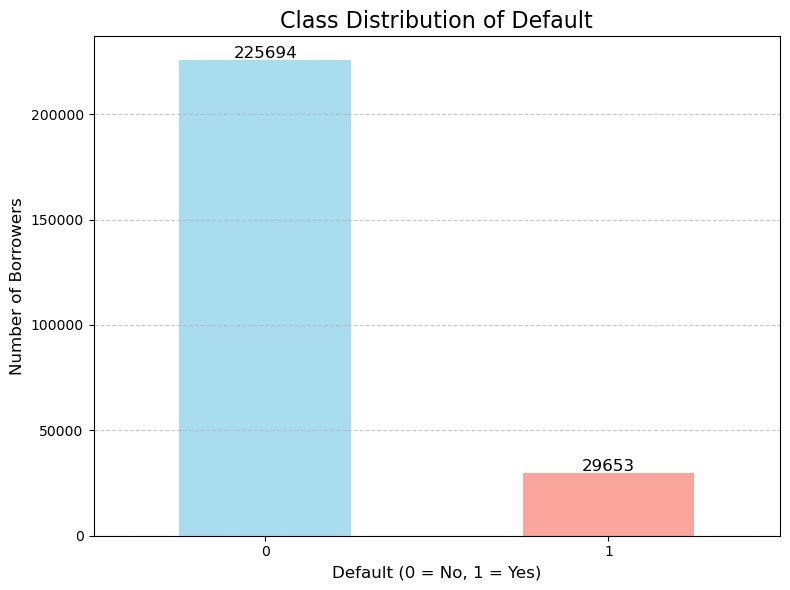

In [20]:
# Count the distribution of 'Default' column (0 and 1)
default_counts = loan['Default'].value_counts()

plt.figure(figsize=(8, 6))
ax = default_counts.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)

# Add count labels on top of the bars
for i, count in enumerate(default_counts):
    ax.text(i, count + 1000, str(count), ha='center', fontsize=12) 

plt.title('Class Distribution of Default', fontsize=16)
plt.xlabel('Default (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Borrowers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




### Summary:
Out of the total 255,347 borrowers, 225,694 did not default (88.3%), while 29,653 defaulted (11.7%). This shows that there is a big imbalance in the data, because most borrowers did not default, and only a small part of them defaulted.

### Conclusion

The dataset is usable, with no missing or duplicate values, and no major inconsistencies. However, there is a class imbalance in the 'Default' variable. This could be addressed in modeling using SMOTE or BalancedBaggingClassifier.

 <h2 style="text-align: center;"> Storytelling With Data Graph </h2>

### Default Rate by Education

#### encoding columns for 'Education'

In [21]:
one_hot = pd.get_dummies(loan['Education']).astype(int)

# Add the one-hot encoded columns
loan_encoded = loan.join(one_hot)

# check results
loan_encoded.head()



,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Bachelor's,High School,Master's,PhD
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,Divorced,Yes,Yes,Other,Yes,0,1,0,0,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,Married,No,No,Other,Yes,0,0,0,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,Divorced,Yes,Yes,Auto,No,1,0,0,1,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,Married,No,No,Business,No,0,0,1,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,Divorced,No,Yes,Auto,No,0,1,0,0,0


In [22]:
# Calculate the default rate for each education level
education_columns = ["Bachelor's", "High School", "Master's", "PhD"]

# Store default rates in a dictionary
default_rates = {}

for edu in education_columns:
    default_rate = loan_encoded[loan_encoded[edu] == 1]['Default'].mean()
    default_rates[edu] = default_rate

# Print the default rates for each education level
for edu, rate in default_rates.items():
    print(f"Default Rate for {edu}: {rate:.2%}")

Default Rate for Bachelor's: 12.10%
Default Rate for High School: 12.88%
Default Rate for Master's: 10.87%
Default Rate for PhD: 10.59%


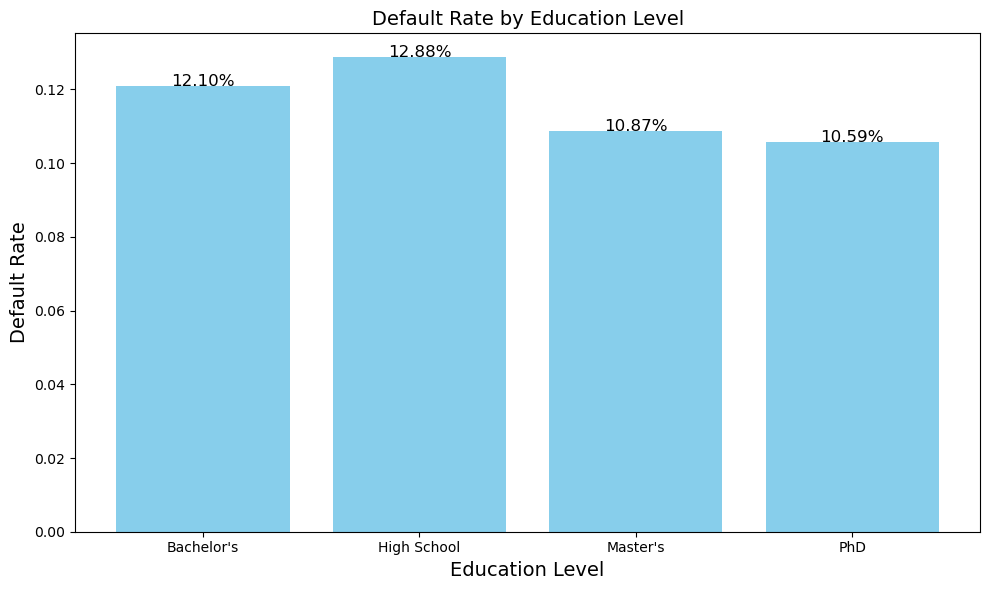

In [23]:

plt.figure(figsize=(10, 6))
plt.bar(default_rates.keys(), default_rates.values(), color='skyblue')


plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Default Rate', fontsize=14)
plt.title('Default Rate by Education Level', fontsize=14)

# Show percentage values on top of the bars
for i, rate in enumerate(default_rates.values()):
    plt.text(i, rate , f'{rate:.2%}', ha='center', fontsize=12)


plt.tight_layout()
plt.show()

There is a **small trend** showing that people with higher education are a bit less likely to default. However, the differences are relatively small, and the variations between the education levels are not extreme.

### Overview of the distributions of numerical features

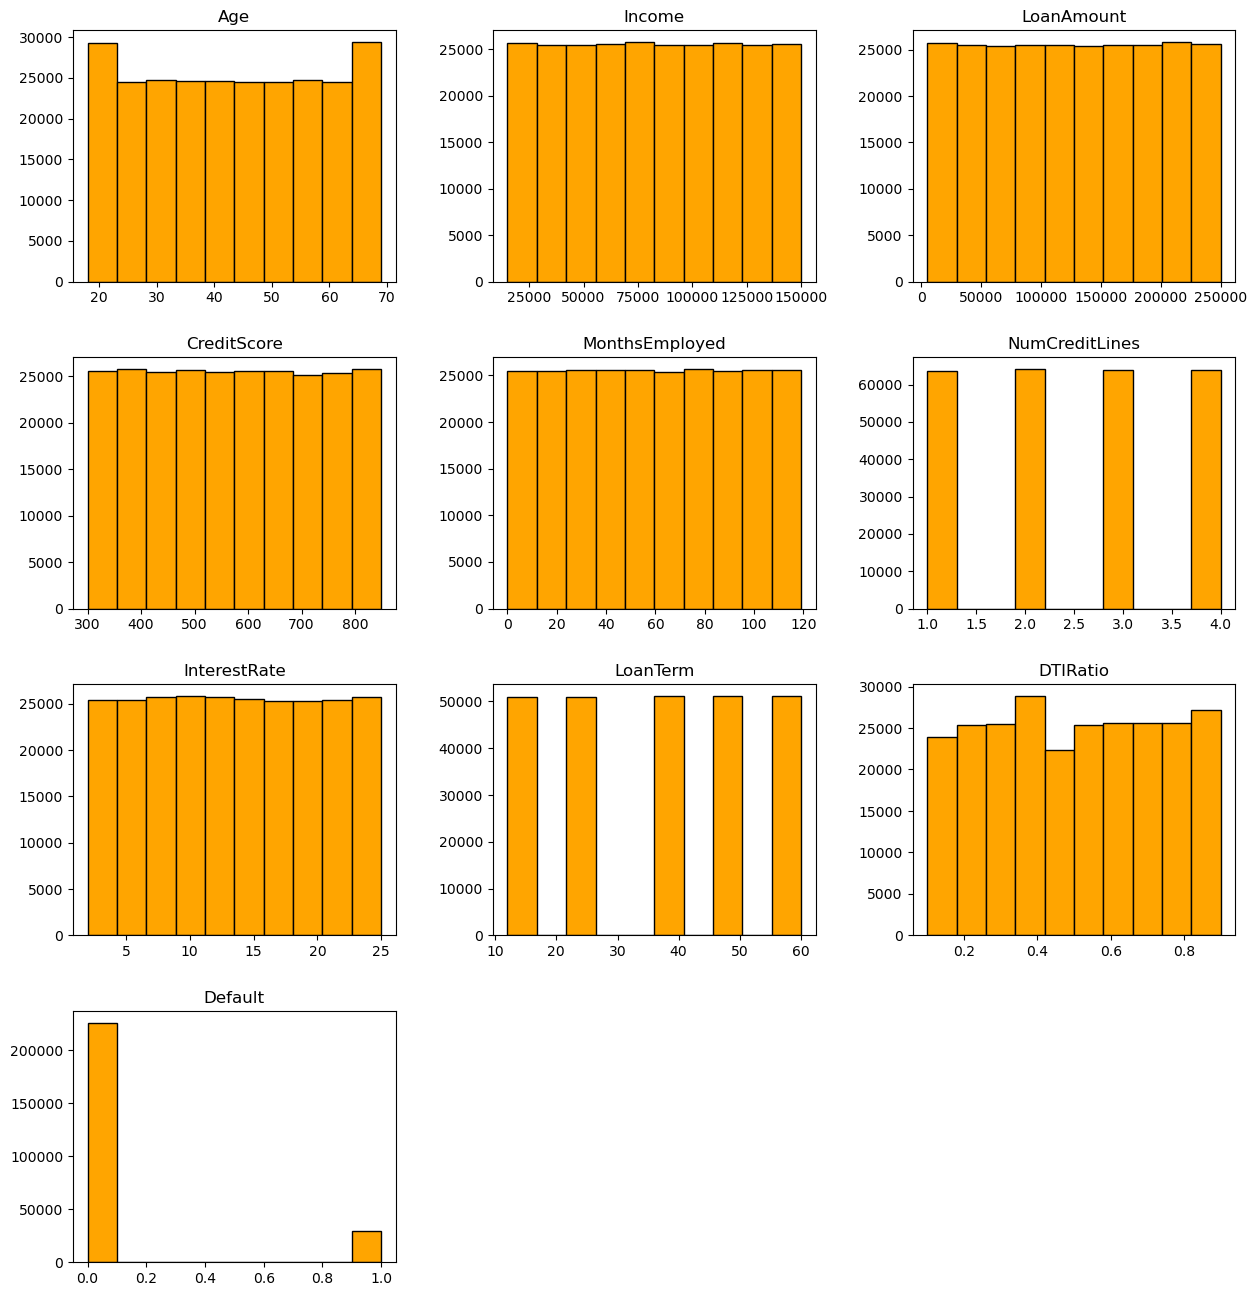

In [24]:
_ = loan.hist(figsize=(15, 16),color = 'orange', edgecolor='black', grid = False)

### Age Distribution of Borrowers
This graph shows how the ages of borrowers are distributed.

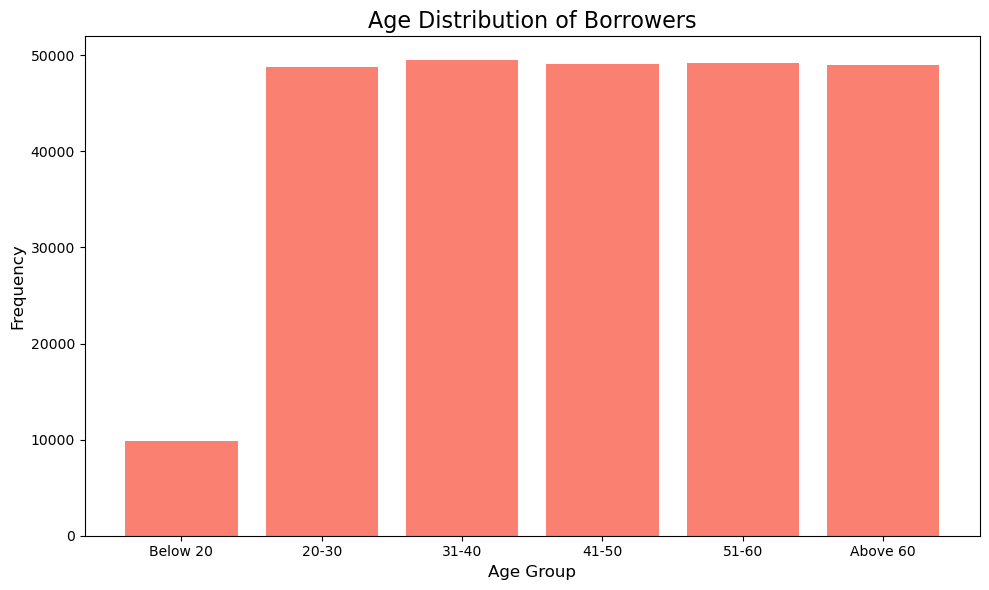

In [25]:
age_bins = [0, 20, 30, 40, 50, 60, 100]  # Age groups
age_labels = ['Below 20', '20-30', '31-40', '41-50', '51-60', 'Above 60']

loan['AgeGroup'] = pd.cut(loan['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = loan['AgeGroup'].value_counts().sort_index()

# bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_group_counts.index, age_group_counts.values, color='salmon')


plt.title('Age Distribution of Borrowers', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.tight_layout()
plt.show()


Most borrowers are evenly spread across the age groups. However, there are very few borrowers below 20 years old. The other age groups, from 20-30 to above 60, have almost the same number of borrowers, meaning people of different ages are applying for loans in similar amounts.

### Loan Purpose Breakdown with a Pie Chart

What is the most common reason for loans?
How do other loan purposes compare in size?

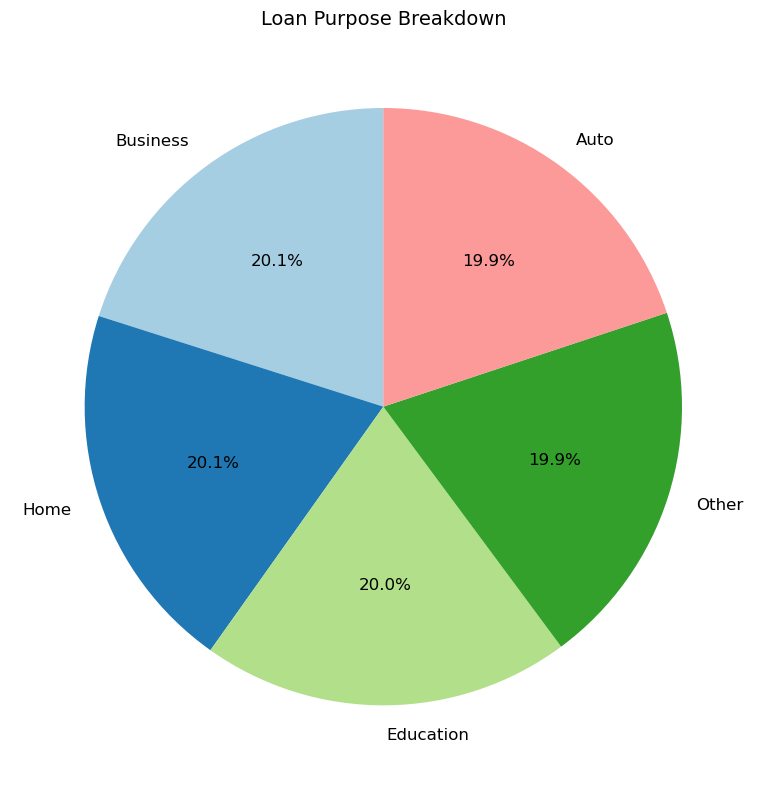

In [26]:
# Count the occurrences of each Loan Purpose
loan_purpose_counts = loan['LoanPurpose'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
loan_purpose_counts.plot(
    kind='pie',
    autopct='%1.1f%%',  
    startangle=90,     
    colors=plt.cm.Paired.colors, 
    textprops={'fontsize': 12}   
)

# Add a title and remove the y-axis label
plt.title('Loan Purpose Breakdown', fontsize=14)
plt.ylabel('')  # Remove the default ylabel
plt.tight_layout()
plt.show()




The pie chart shows that the distribution of loan purposes is very balanced. There is no significant difference between the categories.

### Correlation Matrix 

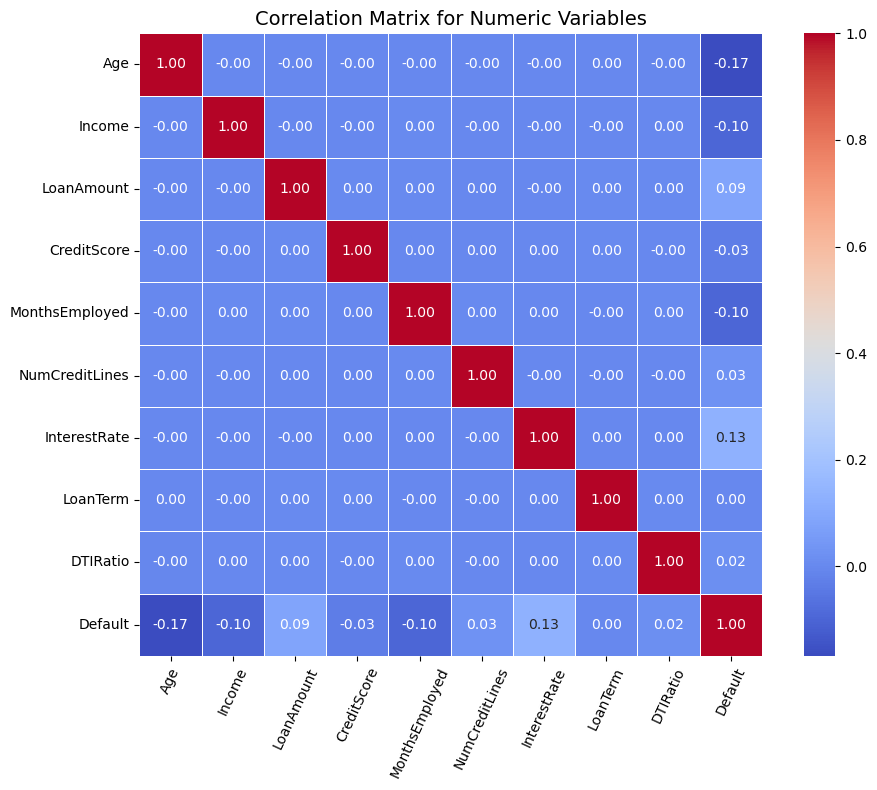

In [27]:
corr_matrix = loan[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)


plt.title('Correlation Matrix for Numeric Variables', fontsize=14)
plt.xticks(fontsize=10, rotation=65)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

The analysis suggest no strong connection between Default and other number columns. But still, we find some small patterns:

- **InterestRate and LoanAmount** show weak positive link to default. When interest rate or loan amount go higher, default chance may also rise a little.
- **Age, Income, and MonthsEmployed** show weak negative link to default. This mean older, higher-income, and long-working borrowers may have a little lower default risk.
- **LoanTerm or NumCreditLines** have minimal or no impact on defaults.